In [4]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib
# Colab 런타임 다시 시작

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#폰트
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'NanumBarunGothic'

In [3]:
df=pd.read_csv('cctv_pop.csv',index_col='구별')
df.head()

,CCTV댓수,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
종로구,1715,20.69,153789,144683,9106,27818,5.92,18.09
중구,2447,78.98,131787,122499,9288,24392,7.05,18.51
용산구,2611,78.64,237285,222953,14332,39070,6.04,16.47
성동구,3829,63.49,292672,285990,6682,46380,2.28,15.85
광진구,3211,112.29,352627,339996,12631,51723,3.58,14.67


* 상관관계
 - CCTV댓수 : 인구수, 외국인비율, 고령자

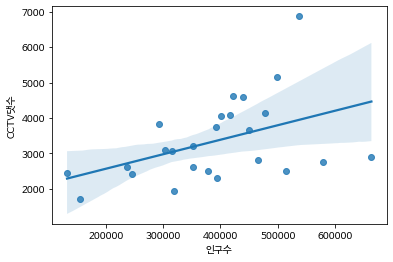

In [ ]:
#cctv 댓수와 인구수 
sns.regplot(x='인구수',y='CCTV댓수',data=df)
plt.show()

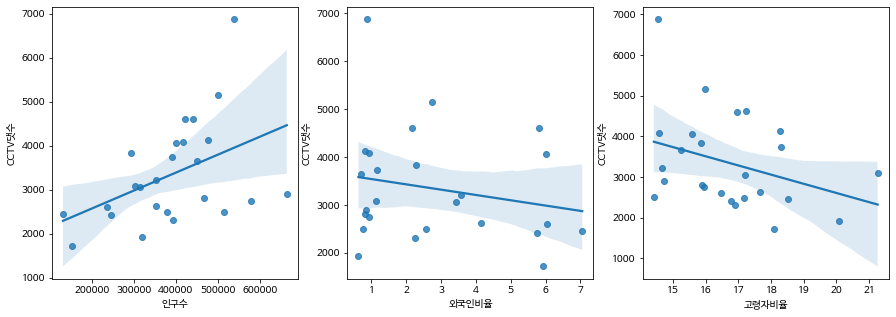

In [6]:
#변수를 따로 지정안해도 여기에 담아달라 _
_,axs=plt.subplots(1,3,figsize=(15,5))
features=['인구수','외국인비율','고령자비율']
for i,feature in enumerate(features):
  sns.regplot(x=feature,y='CCTV댓수',data=df,ax=axs[i])  #ax는 축
plt.show()

* 구별 CCTV댓수 시각호

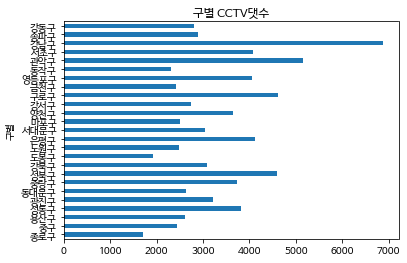

In [7]:
df.CCTV댓수.plot(kind='barh')
plt.title('구별 CCTV댓수')
plt.show()

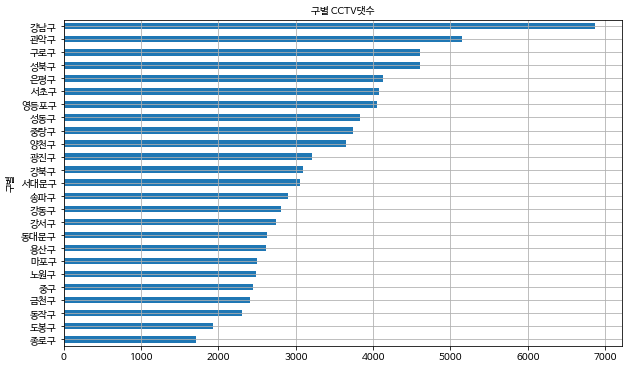

In [8]:
df.CCTV댓수.sort_values().plot(kind='barh',grid=True,figsize=(10,6))
plt.title('구별 CCTV댓수',fontsize=10)
plt.show()

* 인구 천명당 CCTV댓수

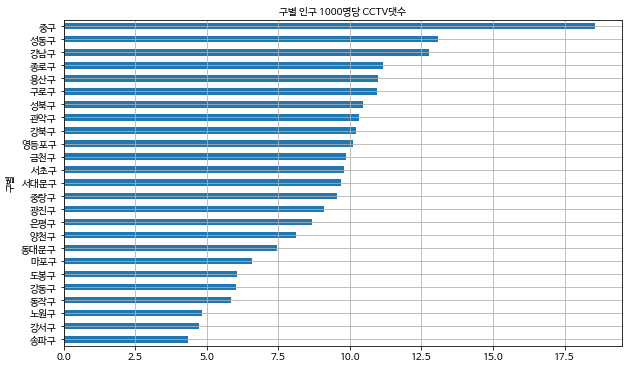

In [9]:
df['CCTV비율'] = (df.CCTV댓수 / (df.인구수/1000)).round(2)
df.CCTV비율.sort_values().plot(kind='barh',grid=True,figsize=(10,6))
plt.title('구별 인구 1000명당 CCTV댓수',fontsize=10)
plt.show()

# 인구수와 CCTV댓수 분석
 - 산점도(Scatter plot)

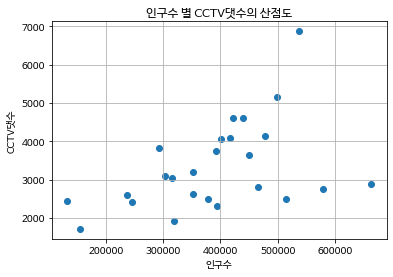

In [79]:
plt.scatter(x=df.인구수,y=df.CCTV댓수)
plt.title('인구수 별 CCTV댓수의 산점도')
plt.xlabel('인구수'),plt.ylabel('CCTV댓수')
plt.grid()
plt.show()

* 회귀선

In [80]:
weight,bias = np.polyfit(df.인구수,df.CCTV댓수,1)  #가중치,절편 x,y의 1차식
weight,bias

(0.004085429243410673, 1751.246023182564)

In [81]:
x=np.array([100000,700000])
y=weight*x+bias

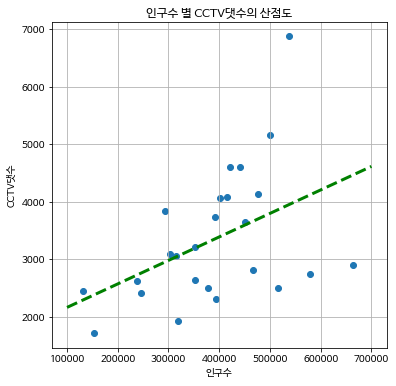

In [82]:
plt.figure(figsize=(6,6))
plt.scatter(x=df.인구수,y=df.CCTV댓수)
plt.plot(x,y,'g--',lw=3)   #lw 선의 굵기
plt.title('인구수 별 CCTV댓수의 산점도')
plt.xlabel('인구수'),plt.ylabel('CCTV댓수')
plt.grid()
plt.show()

* 회귀선과 산점도 사이의 절대오차

In [83]:
df['오차']=abs(df.CCTV댓수-(df.인구수*weight+bias)).round(2)
df_sort=df.sort_values(by='오차',ascending=False)
df_sort.head()

,구별,CCTV댓수,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율,오차
22,강남구,6871,63.24,537800,533042,4758,78226,0.88,14.55,2922.61
23,송파구,2897,204.31,663965,658338,5627,97691,0.85,14.71,1566.83
15,강서구,2744,79.11,579768,574315,5453,92558,0.94,15.96,1375.85
10,노원구,2492,68.47,514946,510956,3990,88345,0.77,17.16,1363.02
20,관악구,5149,48.29,499449,485699,13750,79871,2.75,15.99,1357.29


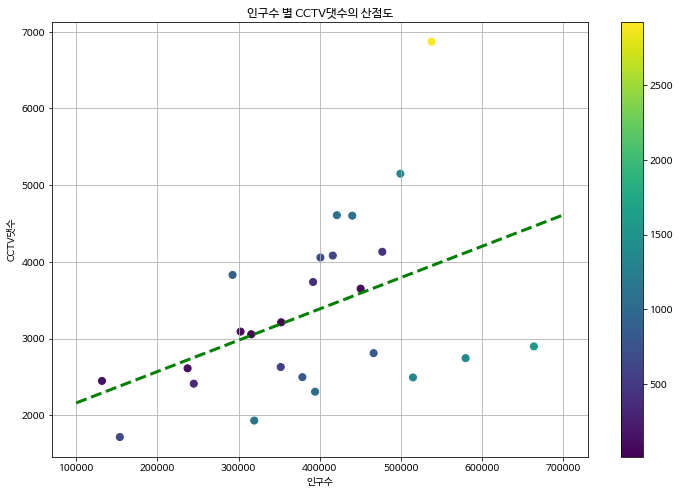

In [84]:
plt.figure(figsize=(12,8))
plt.scatter(x=df.인구수,y=df.CCTV댓수,c=df.오차,s=50)  #s = scalar or array , c=color 
plt.plot(x,y,'g--',lw=3)
plt.title('인구수 별 CCTV댓수의 산점도')
plt.xlabel('인구수'),plt.ylabel('CCTV댓수')
plt.grid()
plt.colorbar()
plt.show()

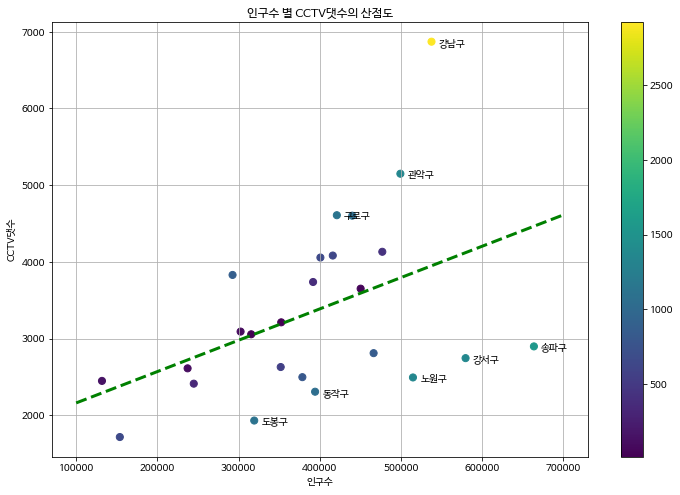

In [16]:
plt.figure(figsize=(12,8))
plt.scatter(x=df.인구수,y=df.CCTV댓수,c=df.오차,s=50)  #s = scalar or array , c=color 
plt.plot(x,y,'g--',lw=3)
for i in range(8):
  plt.text(df_sort.인구수[i]+9000,df_sort.CCTV댓수[i]-50,df_sort.index[i],fontsize=10)
plt.title('인구수 별 CCTV댓수의 산점도')
plt.xlabel('인구수'),plt.ylabel('CCTV댓수')
plt.grid()
plt.colorbar()
plt.show()

In [ ]:
!pip install mpld3

In [88]:
!pip install mplcursors

In [89]:
import mplcursors

In [40]:
df=pd.read_csv('cctv_pop.csv')
df.head()

,구별,CCTV댓수,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율
0,종로구,1715,20.69,153789,144683,9106,27818,5.92,18.09
1,중구,2447,78.98,131787,122499,9288,24392,7.05,18.51
2,용산구,2611,78.64,237285,222953,14332,39070,6.04,16.47
3,성동구,3829,63.49,292672,285990,6682,46380,2.28,15.85
4,광진구,3211,112.29,352627,339996,12631,51723,3.58,14.67


In [42]:
df['오차']=abs(df.CCTV댓수-(df.인구수*weight+bias)).round(2)
df_sort=df.sort_values(by='오차',ascending=False)
df_sort.head()

,구별,CCTV댓수,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율,오차
22,강남구,6871,63.24,537800,533042,4758,78226,0.88,14.55,2922.61
23,송파구,2897,204.31,663965,658338,5627,97691,0.85,14.71,1566.83
15,강서구,2744,79.11,579768,574315,5453,92558,0.94,15.96,1375.85
10,노원구,2492,68.47,514946,510956,3990,88345,0.77,17.16,1363.02
20,관악구,5149,48.29,499449,485699,13750,79871,2.75,15.99,1357.29


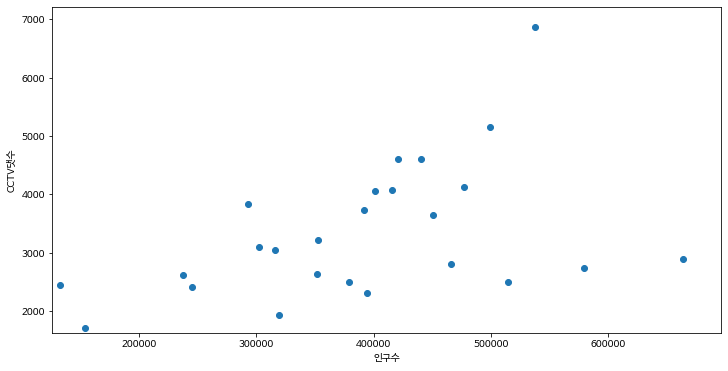

In [58]:
x = df['인구수']
y = df['CCTV댓수']
fig, ax = plt.subplots(1, figsize=(12,6))
tt = df['구별'].values
ax.scatter(x, y)
plt.xlabel('인구수')
plt.ylabel('CCTV댓수')

# cursor grid lines
lnx = plt.plot([60,60], [0,1.5], color='black', linewidth=0.3)
lny = plt.plot([0,100], [1.5,1.5], color='black', linewidth=0.3)
lnx[0].set_linestyle('None')
lny[0].set_linestyle('None')
# annotation
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points")
annot.set_visible(False)
# xy limits
plt.xlim(x.min()*0.95, x.max()*1.05)
plt.ylim(y.min()*0.95, y.max()*1.05)
def hover(event):
    # check if event was in the axis
    if event.inaxes == ax:
        # draw lines and make sure they're visible
        lnx[0].set_data([event.xdata, event.xdata], [0, 1.5])
        lnx[0].set_linestyle('--')
        lny[0].set_data([0,100], [event.ydata, event.ydata])
        lny[0].set_linestyle('--')
        lnx[0].set_visible(True)
        lny[0].set_visible(True)
        
        # get the points contained in the event
        cont, ind = sc.contains(event)
        if cont:
            # change annotation position
            annot.xy = (event.xdata, event.ydata)
            # write the name of every point contained in the event
            annot.set_text("{}".format(', '.join([tt[n] for n in ind["ind"]])))
            annot.set_visible(True)    
        else:
            annot.set_visible(False)
    else:
        lnx[0].set_visible(False)
        lny[0].set_visible(False)
fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()

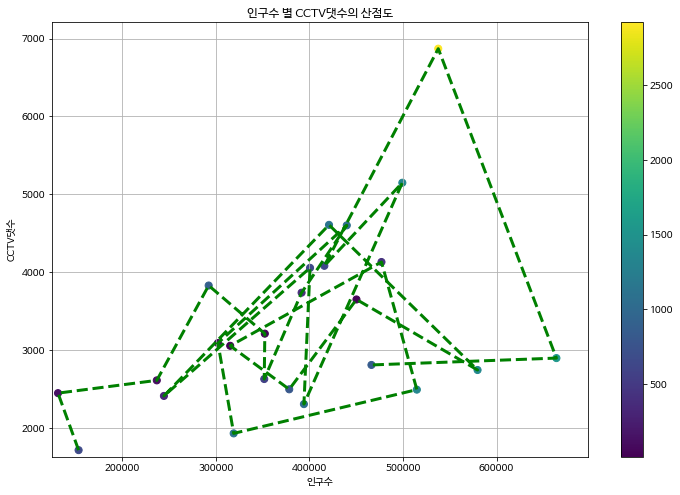

In [63]:
plt.figure(figsize=(12,8))
#plt.scatter(x=df.인구수,y=df.CCTV댓수,c=df.오차,s=50)  #s = scalar or array , c=color 
tt = df['구별'].values
plt.plot(x,y,'g--',lw=3)
plt.title('인구수 별 CCTV댓수의 산점도')
plt.xlabel('인구수'),plt.ylabel('CCTV댓수')
plt.grid()

sc=plt.scatter(x=df.인구수,y=df.CCTV댓수,c=df.오차,s=50)
#
lnx = plt.plot([60,60], [0,1.5], color='black', linewidth=0.3)
lny = plt.plot([0,100], [1.5,1.5], color='black', linewidth=0.3)
lnx[0].set_linestyle('None')
lny[0].set_linestyle('None')
# annotation
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points")
annot.set_visible(False)
# xy limits
plt.xlim(x.min()*0.95, x.max()*1.05)
plt.ylim(y.min()*0.95, y.max()*1.05)
def hover(event):
    # check if event was in the axis
    if event.inaxes == ax:
        # draw lines and make sure they're visible
        lnx[0].set_data([event.xdata, event.xdata], [0, 1.5])
        lnx[0].set_linestyle('--')
        lny[0].set_data([0,100], [event.ydata, event.ydata])
        lny[0].set_linestyle('--')
        lnx[0].set_visible(True)
        lny[0].set_visible(True)
        
        # get the points contained in the event
        cont, ind = sc.contains(event)
        if cont:
            # change annotation position
            annot.xy = (event.xdata, event.ydata)
            # write the name of every point contained in the event
            annot.set_text("{}".format(', '.join([tt[n] for n in ind["ind"]])))
            annot.set_visible(True)    
        else:
            annot.set_visible(False)
    else:
        lnx[0].set_visible(False)
        lny[0].set_visible(False)
fig.canvas.mpl_connect("motion_notify_event", hover)

#
# cursor = mplcursors.cursor(sc, hover=True)
# @cursor.connect("add")
# def on_add(sel):
#     sel.annotation.set(text=tt[sel.target.index])
plt.colorbar()
plt.show()

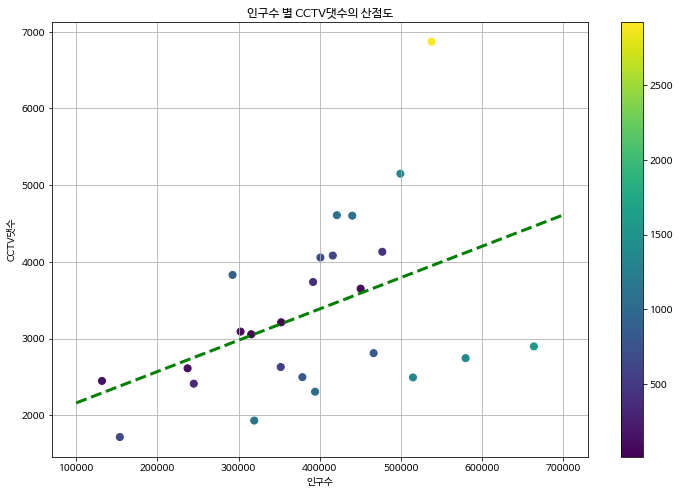

In [86]:
plt.figure(figsize=(12,8))
plt.scatter(x=df.인구수,y=df.CCTV댓수,c=df.오차,s=50)  #s = scalar or array , c=color 
plt.plot(x,y,'g--',lw=3)
plt.title('인구수 별 CCTV댓수의 산점도')
plt.xlabel('인구수'),plt.ylabel('CCTV댓수')
plt.grid()
plt.colorbar()
mplcursors.cursor(hover=True)
plt.show()

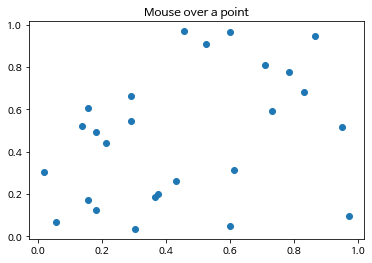

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import mplcursors
np.random.seed(42)

fig, ax = plt.subplots()
ax.scatter(*np.random.random((2, 26)))
ax.set_title("Mouse over a point")

mplcursors.cursor(hover=True)

plt.show()

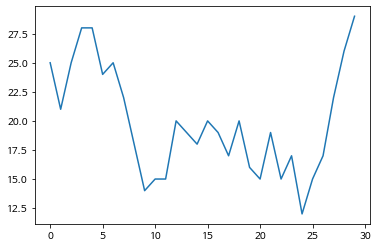

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import mplcursors

x = np.arange(30)
y = 30 + np.random.randint(-5, 6, x.size).cumsum()

fig, ax = plt.subplots()
ax.plot(x, y)
dots = ax.scatter(x, y, color='none')

mplcursors.cursor(dots, hover=True)

plt.show()